<a href="https://colab.research.google.com/github/AliGhorbanibh1380/handwritten-digit-recognition-model/blob/main/Deep_Learning_Model_Training_on_MNIST_Dataset_(tesnsorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model Training on MNIST Dataset  

This notebook demonstrates the process of training a deep learning model on the MNIST dataset using TensorFlow and Keras. The MNIST dataset consists of 70,000 images of handwritten digits (0-9) and serves as a standard benchmark for image classification tasks.  

## Setup Environment  

In this section, we will import the necessary libraries and modules required to build and train our model.

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Load MNIST Dataset  

We will download and load the MNIST dataset from TensorFlow. The dataset is split into training and test sets.

In [ ]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## Explore the Data  

Before training the model, let's take a look at some samples from the dataset to understand its structure.

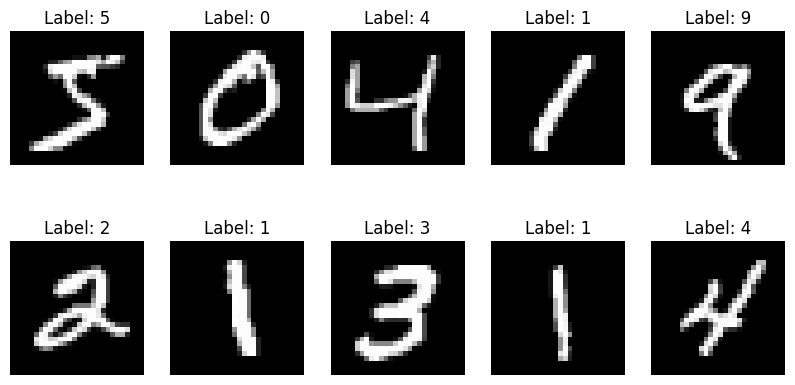

In [ ]:
# Visualizing some samples from the training dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Build the Model  

We will create a simple neural network model with the following architecture:  
- Input Layer: 28x28 pixels (the size of each MNIST image)  
- Hidden Layers: Two dense layers with ReLU activation  
- Output Layer: 10 units (one for each digit) with softmax activation

In [ ]:
# Building the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model  

Now we will train the model for 5 epochs and track the accuracy and loss during the training process.

In [ ]:
# Training the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2731 - accuracy: 0.9228 - val_loss: 0.1227 - val_accuracy: 0.9653
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1189 - accuracy: 0.9641 - val_loss: 0.0994 - val_accuracy: 0.9722
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0829 - accuracy: 0.9752 - val_loss: 0.0869 - val_accuracy: 0.9752
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0826 - val_accuracy: 0.9763


## Evaluate the Model  

After training, we will evaluate the model on the test dataset to see how well it performs.

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9752

Test accuracy: 0.9752


## Visualize Training History  

We will plot the training and validation accuracy and loss to visualize the model's performance throughout the epochs.

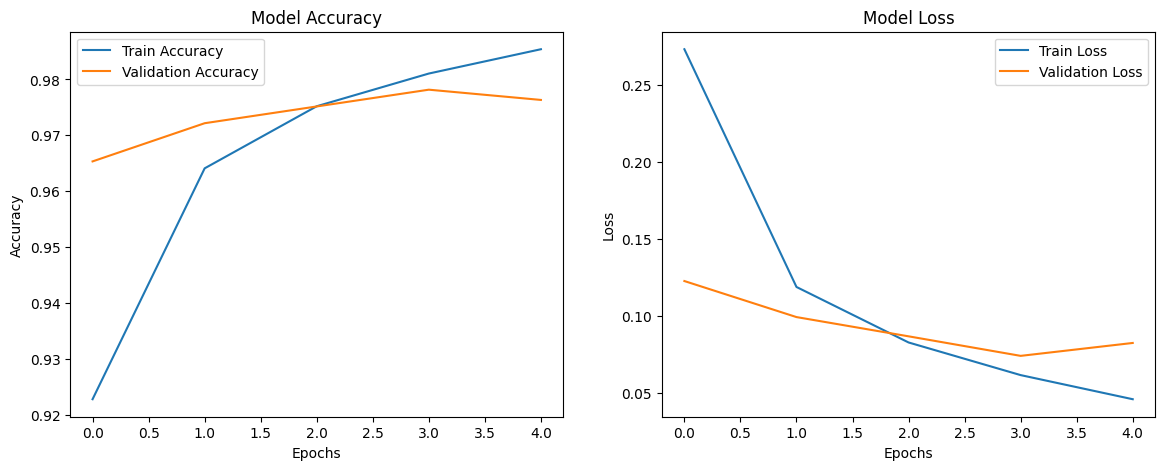

In [ ]:
# Plotting accuracy
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Conclusion  

In this notebook, we successfully trained a neural network model on the MNIST dataset. The model achieved an impressive accuracy of approximately 97.5% on the test set. Future work could involve experimenting with different architectures, data augmentation techniques, and hyperparameter tuning to further improve performance.